<a href="https://colab.research.google.com/github/kimdesok/Statistical-Thinking-in-Python-Part-2/blob/main/Stats_by_Python9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case studies
>* Beak depth of birds in the Galapagos, Geospiza scandens & Geospiza fortis
>* 
>* 

In [ ]:
#!cp -r /content/utilities/utilities.py '/content/drive/MyDrive/"Colab Notebooks"/utilities'

In [28]:
#Importing modules
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')
sys.path.insert(0,'/content/drive/MyDrive')
print(sys.path)

['/content/drive/MyDrive', '/content/drive/MyDrive/Colab Notebooks', '', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [37]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

#Importing numpy
import numpy as np
import pandas as pd


#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/finch_beaks_1975.csv'

df0 = pd.read_csv(file_path)
df0['year'] = 1975
print(df0.info())

#Load a csv file at the Google drive to the colab
file_path = r'/content/drive/MyDrive/datasets/finch_beaks_2012.csv'
df1 = pd.read_csv(file_path)
df1['year'] = 2012
df1.columns = df0.columns

print(df1.info())

df2 = pd.concat([df0, df1], axis = 0)

print(df2.info())
print(df2)

#file_path = r'/content/drive/MyDrive/datasets/fortis_beak_depth_heredity.csv'

#df2 = pd.read_csv(file_path)

#print(df.info())

df2 = df2[df2['species']=='scandens'][['year', 'Beak depth, mm']]
df2.columns = ['year', 'beak_depth']
print(df2)
#treated = df[df['Treatment']=='Pesticide']['AliveSperm']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             403 non-null    int64  
 1   species          403 non-null    object 
 2   Beak length, mm  403 non-null    float64
 3   Beak depth, mm   403 non-null    float64
 4   year             403 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   band             248 non-null    int64  
 1   species          248 non-null    object 
 2   Beak length, mm  248 non-null    float64
 3   Beak depth, mm   248 non-null    float64
 4   year             248 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 9.8+ KB
None
<class 'panda

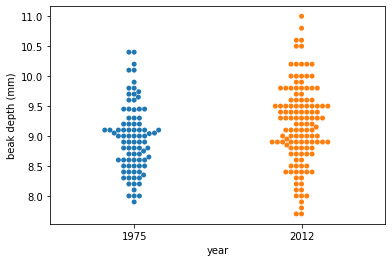

In [38]:
# Create bee swarm plot
_ = sns.swarmplot(x='year', y='beak_depth', data=df2)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

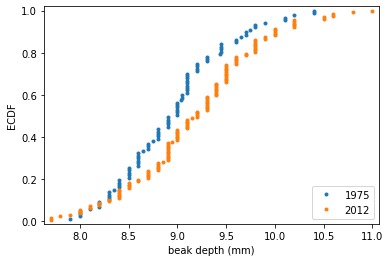

In [40]:
import utils.utils

bd_1975 = df2[df2['year'] == 1975]['beak_depth']
bd_2012 = df2[df2['year'] == 2012]['beak_depth']
# Compute ECDFs
x_1975, y_1975 = utils.utils.ecdf(bd_1975)
x_2012, y_2012 = utils.utils.ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

In [47]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
mean_diff = utils.utils.diff_of_means(bd_2012, bd_1975)
#mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = utils.utils.draw_bs_reps(bd_1975, np.mean, size=10000)
bs_replicates_2012 = utils.utils.draw_bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [0.25, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.2262204724409429 mm
95% confidence interval = [-0.02531344  0.39065981] mm


#Hypothesis test on Pearson correlation
>* permute the one variables but leave the other values fixed
>* This simulates the hypothesis that they are totally independent of each other. 
>* For each permutation, compute the Pearson correlation coefficient.
>* Assess how many permutation replicates have a Pearson correlation coefficient greater than the observed one --> P value


In [ ]:
# Compute observed correlation: r_obs
r_obs = utils.utils.pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = utils.utils.pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) /len(perm_replicates)
print('Observed r = %.2f,' %r_obs, 'p-val = %.6f'  %p)

Observed r = 0.80, p-val = 0.000000


In [ ]:
#Print multiple variables
#Pass it as tuple
print("Observed correlation is %.2f with p-value %.6f" % (r_obs, p))
#Pass it as dictionary
print("Observed correlation is %(r).2f with p-value %(p).6f"  % {'r': r_obs, 'p': p})
#String formatting
print("Observed correlation is {} with p-value {}".format(r_obs, p))
#String formatting with numbers satrting with 0
print("Observed correlation is {0} with p-value {1}".format(r_obs, p))
#String formatting with explilcit names
print("Observed correlation is {r} with p-value {p}".format(r=r_obs, p=p))
#Use the new f-string formatting in Python 3.6:
print(f'Observed correlation is {r_obs} with p-value {p}')

Observed correlation is 0.80 with p-value 0.000000
Observed correlation is 0.80 with p-value 0.000000
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0
Observed correlation is 0.8041324026815344 with p-value 0.0


#Neonicotinoid insecticides have unintended consequences?
>* A study of pesticides harmful effects on bees' sperm counts.
>* Start with the usual EDA
>* Test the Ho: male bees exposed to insecticide have the same number of sperm counts compared to the untreated ones.

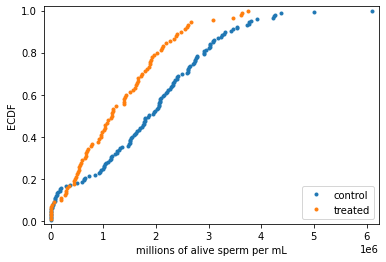

In [ ]:
# Compute x,y values for ECDFs
x_control, y_control = utils.utils.ecdf(control)
x_treated, y_treated = utils.utils.ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()



In [ ]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = utils.utils.draw_bs_reps(control_shifted,
                       np.mean, size=50000)
bs_reps_treated = utils.utils.draw_bs_reps(treated_shifted,
                       np.mean, size=50000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value = %.100f'% p)


p-value = 0.0000400000000000000032721221565612523818344925530254840850830078125000000000000000000000000000000000


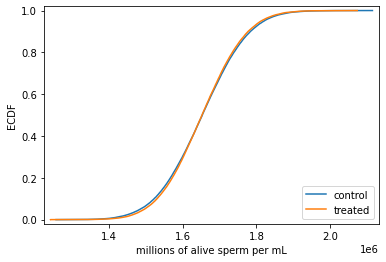

In [ ]:
# Compute x,y values for ECDFs
x_control, y_control = utils.utils.ecdf(bs_reps_control)
x_treated, y_treated = utils.utils.ecdf(bs_reps_treated)

# Plot the ECDFs
plt.plot(x_control, y_control)
plt.plot(x_treated, y_treated)

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [ ]:
!pip show numpy
!pip show pandas
!pip show matplotlib

Name: numpy
Version: 1.19.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: yellowbrick, xgboost, xarray, wordcloud, torchvision, torchtext, tifffile, thinc, Theano-PyMC, tensorflow, tensorflow-probability, tensorflow-hub, tensorflow-datasets, tensorboard, tables, statsmodels, spacy, sklearn-pandas, seaborn, scs, scipy, scikit-learn, resampy, qdldl, PyWavelets, python-louvain, pystan, pysndfile, pymc3, pyerfa, pyemd, pyarrow, plotnine, patsy, pandas, osqp, opt-einsum, opencv-python, opencv-contrib-python, numexpr, numba, nibabel, netCDF4, moviepy, mlxtend, mizani, missingno, matplotlib, matplotlib-venn, lightgbm, librosa, Keras-Preprocessing, kapre, jpeg4py, jaxlib, jax, imgaug, imbalanced-learn, imageio, hyperopt, holoviews, h5py, gym, gensim, folium, fix-yahoo-finance, fbprophet, fastprog